# Chapter 2 - Machine Learning Project

The notebook contains tasks and exercises from chapter 2, creating an end to end machine learning project on the topic of predicting housing praces in California.

In [1]:
import sys
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Getting and Preprocessing Data

### Downloading Data

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt # for plotting data for example histograms

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

To familiarize yourself with the data and its attributes, we use "head()" method to show the first 5 rows of data.

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


To see description of the data, we use "info()" method.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


To check how many districts belong to each category of ocean_proximity, we use "value_counts()" method.

In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

To show the summary of numerical attributes, we use "describe()" method.

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


To plot histograms of each numerical value present in the data set, we use "hist()" method. (needs matplotlib library)

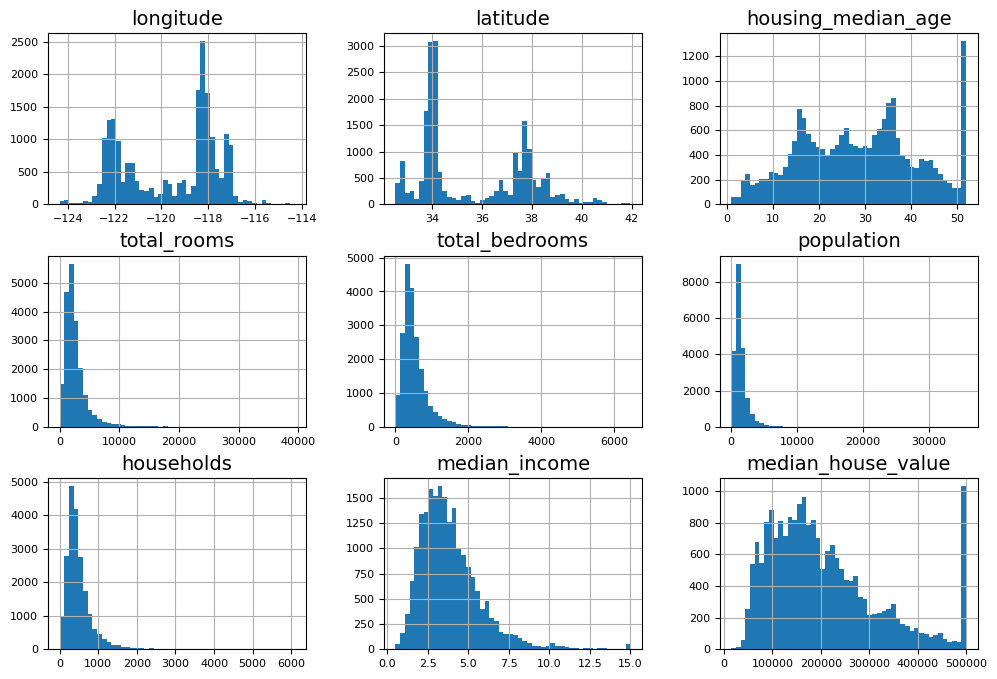

In [7]:
# defining the default font sizes for the plots
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

median_income values has been scaled and capped - 3 means around 30.000$ <br>
housing_median_age and median_house_value were also capped <br>
attributes have very different scales <br>
many histograms are skewed right - they extend much further to the right of the median than to the left <br>

### Creating a Test Set

Creating a testing set consisting of random 20% of data set.

In [8]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
      # Shuffle the indices of the data
    shuffled_indices = np.random.permutation(len(data))
    
    # Determine the size of the test set
    test_set_size = int(len(data) * test_ratio)
    
    # Select the first 'test_set_size' indices for the test set
    test_indices = shuffled_indices[:test_set_size]
    
    # Select the remaining indices for the training set
    train_indices = shuffled_indices[test_set_size:]
    
    # Return the training and test sets
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print("training set: ", len(train_set))
print("test set: ", len(test_set))

training set:  16512
test set:  4128


In [10]:
np.random.seed(42)

To make sure that the output of dividing the data remains the same, we can set the random seed -> "np.random.seed(20)". <br>
Note that this will break the next time you fetch an updated data base. <br>
To have a stable train/test data split, even after updating the dataset, we can compute a hash of each instance's identifier and put that instance in the test set if the hash is lower or equal to 20% of maximum hash value. This solution will ensure test set consistency across multiple runs and refreshing dataset. <br>
The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set. Below is the possible implementation of this solution.

In [11]:
from zlib import crc32  # CRC32 is a hashing function

# This function determines if a given identifier should belong to the test set based on its hash value
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

# This function splits the data into training and test sets based on the has of an identifier column
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]   # extracts the idenfitier column from the data
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]    # returns the training and test sets as a tuple

Since our housing dataset doesn't have identifier column, we can use the row index as ID. <br>
Make sure, that when adding data to this dataset in such case, data needs to be appended to the end of the dataset and no row can ever be deleted.

In [12]:
housing_with_id = housing.reset_index()   # adds an 'index' column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

If the above condition cannot be accepted, we can use district's latitude and longitude (which are guaranteed not to change for the next million years) and combine them into ID. <br>
Note that unfortunately, with this method many districts can have exactly the same ID since the location information is not that accurate. Such situation will introduce sampling bias.

In [13]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

Scikit-Learn also provides few functions that split datasets into multiple substets in various ways. <br>
The most common and easy one is "shuffle_and_split_data()" which does what "shuffle_and_split_data()" function implemented above does, but with some additional features. It has a "random_state" parameter which allows to set random generator seed. It can also take multiple datasets with an identical number of rows and it splits them on the same indices - very useful, when for example, we have a separate DataFrame for labels.<br>
This method is presented below:

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In small datasets it is not good to have purely random sampling methods, since it may introduce a significant sampling bias. <br>
To overcome the issue, stratified sampling is introduced - the population is divided into homogenous subgroups called strata, and proper number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population.

In our dataset case, we want to make sure that the test set is representative of the various categories of incomes in the whole dataset (assuming this measure is very important to us and we shouldn't let it be biased). <br>
The following code uses the "pd.cut()" function to create an income category attribute with five categories labeld from 1 to 5; category 1 ranges from 0 to 1.5 (less than 15.000$), category 2 from 1.5 to 3, and so on:

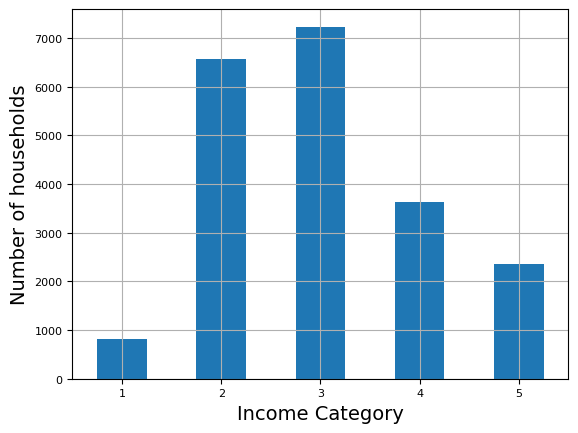

In [15]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

housing["income_cat"]. value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of households")
plt.show()

Now, we're ready to do stratisfied sampling based on the income category. SK-learn has various different splitter classes, but each one used the "split()" method that returns an iterator over different training/test splits of the same data. In other words, "split()" method yields the training and test indices, not the data itself. <br>
Having multiple splits can be useful if we want to better estimate the performance of the model. The following code generates 10 different stratified splits of the same dataset:

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [17]:
# For now, we can just use the first split:
strat_train_set, strat_test_set = strat_splits[0]

There is a shorter way to get a single split using the "train_test_split()" function with the stratify argument:

In [18]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

To check if it works correctly, we can start by looking at the income category proportions in the test set:

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

We can also check the income category proportions in the full dataset. The table compares the income category proportions in the overall dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling.

In [20]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [21]:
# We can remove "income_cat" column, since we won't use it again
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The cdf() method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [22]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


Another way to obtain the same result is using simulation.

In [23]:
np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

np.float64(0.1071)

## Explore and Visualize the Data to Gain Insights

So far, we took a glance at the data to get a general understanding of the kind of data we are working with. <br>
Firts, we make sure we leave the test set alone, and explore the training set from now on. If the training set is very large, it is a good idea to sample an exploration set, to make manipulations easy and fast. In our case, the training set is quite small so we can continue working directly on it. <br>
It is a good idea to make a copy of the original data to revert to it afterwards, since we will experiment with various transformations on the full set.

In [24]:
# Making a copy of the training dataset
housing = strat_train_set.copy()

### Visualizing Geographical Data

Since we are working with data that includes geographical information - longitude and latitude, it is a good idea to create a scatterplot of all teh districts to visualize the data.

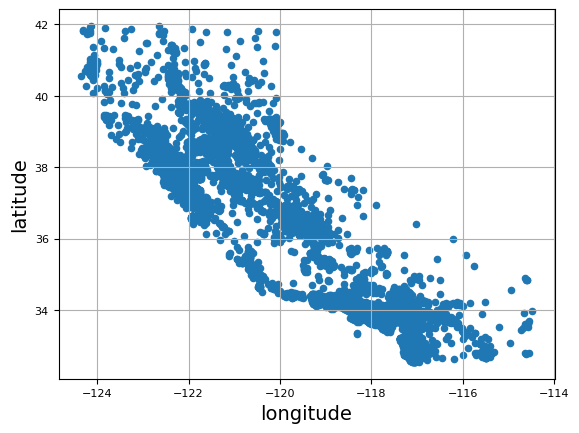

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

We need to add "alpha=0.2" to better visualize the overlapping points.

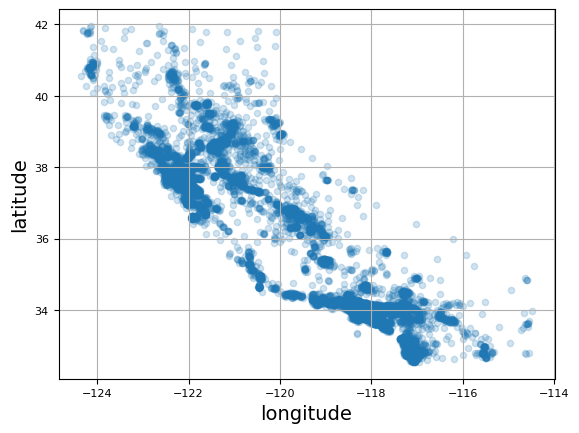

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

Now, lets add prices. We use a predefined colour map (option "cmap") called "jet", which ranges from blue (low values) to red (high values). Smaller circles indicate areas with smaller population.

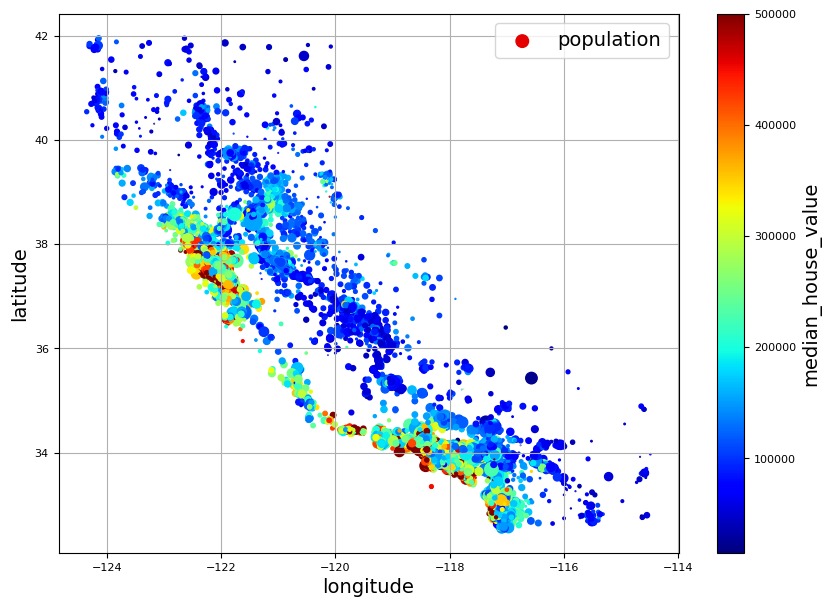

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

### Looking for Correlations

Since our dataset is not too large, we can easily compute the *standard correlation coefficient* between every pair of attributes using the "corr()" method:

In [28]:
corr_matrix = housing.corr(numeric_only=True)

In [29]:
# We can see how much each attribute correlates with the median house value:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

The correlation coefficient ranges from -1 to 1. When the coefficient is close to 1, there is a strong positive correlation. When the coefficient is close to -1, there is a strong negative correlation. When the coefficient is close to 0, there is no linear correlation.

Another way to check for correlation between attributes is to use the Pandas "scatter_matrix()" function, which plots every numerical attribute against every other numerical attributes. <br>
Since there are 11 attributes in our dataset, it would create 121 plots (11^2). That is why we decide to focus on few most promising attributes that seem most correlated with median housing value.

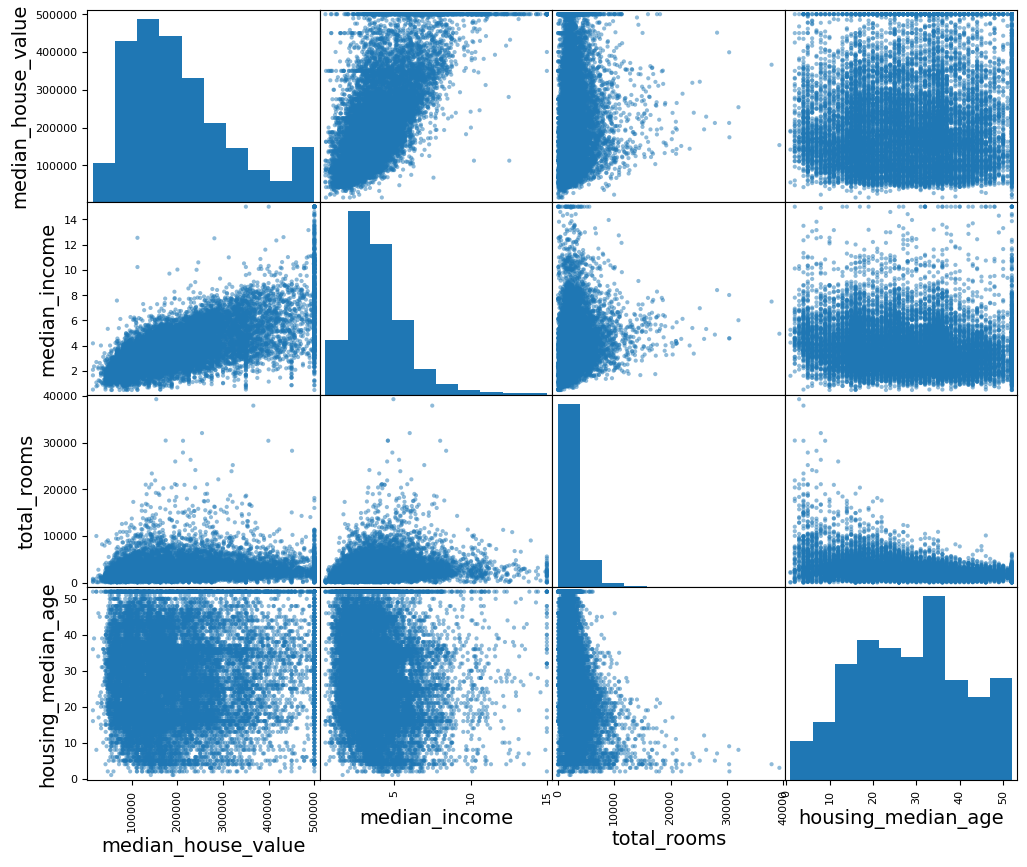

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 10))
plt.show()

The main diagonal (from top left to bottom right) displays a histogram instead of being full of straight lines if Pandas plotted each variable against itself.

Looking at the correlation scatterplots, the most promising attribute to predict median house value is the median income (because it is the most linear and dense where median_house_value is dense, I think).<br>
We can zoom in on this scatterplot:

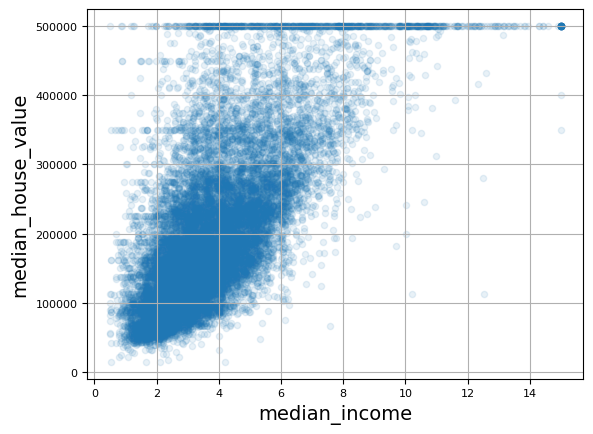

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

We can see that the correlation is indeed quite strong - we can notice an upward trend, and the points are not too dispersed. The price cap is clearly visible as a horizontal line at 500.000$.<br>
We can also notice horizontal lines at around 450.000$, 350.000$, and possibly and 280.000$. We may want to remove the corresponding districts to prevent algorithms from learning to reproduce these data quirks.

### Experimenting with Attribute Combinations

One last thing worth doing before preparing the data for machine learning algorithms is trying out various attribute combinations. <br>
For example, total nuber of rooms in a district is useless unless we don't know how many households there are - what we really want is the number of rooms per household. To create such new attributes, we do the following:

In [32]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

And now we look at the correlation matrix again:

In [33]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

The new "bedrooms_ratio" attribute is much more correlated with the median house value than the total number of rooms or bedrooms etc.!

## Preparing Data for ML Algorithms

We will use functions to prepare the data. <br>
However, before that we will revert to a clean training set, as well as separate predictors and labels.

In [34]:
housing = strat_train_set.drop("median_house_value", axis=1)    # drop() creates a copy of the data and does not affect the original data
housing_labels = strat_train_set["median_house_value"].copy()

### Cleaning Data

We cannot allow ML Algorithms to work on missing data pieces. There are generally 3 ways we can cope with this problem:<br>
1) Getting rid of the corresponding districts with empty data.
2) Getting rid of the whole attribute.
3) Setting the missing values to some value (zero, mean, median, etc.). This is called imputation.

We can accomplish this easily using Pandas DataFrame's dropna(), drop(), fillna() methods.

In [35]:
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11192\1253435761.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


Generally, the option 3 is the least destructive, but instead of the preceding code, we will use a handy SkLearn class - "SimpleImputer". <br>
The benefit is that it stores the median value of each feature, what makes it possible to impute missing values not only on the training set, but also on teh validation set, the test set, and new data fed to the model.

In [36]:
from sklearn.impute import SimpleImputer

# Creating SimpleImputer instance, specifying that we want to replace each attribute's missing values with median of that attribute
imputer = SimpleImputer(strategy="median")

Median can only be computed on numerical attributes, so we need to create a copy of the data with only numerical attributes (in our case this excludes ocean_proximity attribute as this is an object type).

In [37]:
housing_num = housing.select_dtypes(include=[np.number])  # selecting only numerical attributes

In [38]:
imputer.fit(housing_num)    # fitting the imputer instance to the training data

SimpleImputer(strategy='median')

Imputer has simply computed the median of each attribute and stored the result in its "statistics_" instance variable. In our case, only the total_bedrooms attribute has missing values, but we cannot be sure that in the future there won't be any missing values in other attributes. <br> Therefore, it is safer to apply the imputer to all numerical attributes.

In [39]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [40]:
# Checking that the imputer instance has computed the correct median values
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

Now, we can use the imputer to transform the training set by replacing  missing values with learned medians:

In [41]:
X = imputer.transform(housing_num)  

In [42]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [43]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

### Handling Text and Categorical Attributes

Very often, data consists of not only numerical attributes, but also text attributes. In our case, there is just one: "ocean_proximity" attribute. We will look at its value for the first few instance to examine it better:

In [44]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


We can see that "ocean_proximty" attribute is a **categorical attribute**, since there are limited number of possible values, each of which represents a category. Most ML algorithms prefer to work with numbers, so we will convert these categories from text to numbers.<br>
For this purpose, we'll use SK-Learn's *Ordinal Encoder* class:

In [45]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [46]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

As we can see, the attribute has now numerical values. To get the list of categories, we use the *categories_* instance variable, which is a list containing 1D array of categories for each categorical attribute.

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

There is an important issue with this representation of data to be noted. ML algorithms will assume that two nearby values are more similar than two distant values. It works well for some cases (e.g. ordered categories like "bad", "average", "good", "excellent"), but in our case it is not true. <br>
To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "<1H OCEAN" (and 0 otherwise), one attribute equal to 1 when category is "INLAND" (and 0 otherwise), and so on. <br>
This is called **one-hot encoding**, because only one attribute is equal to 1 (hot), while all the others will be equal to 0 (cold). SK-learn provides **OneHotEncoder** class to convert categorical values into one-hot vectors:

In [48]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [49]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16344 stored elements and shape (16344, 5)>

By default, the **OneHotEncoder** class returns a sparse array (which is very efficient, since in one-hot encoding you have 0s and only one 1 per row, so in large attributes it can be huge waste of resources to make it an array instead of sparse array which stores only nonzero values and their positions), but we can convert it to a dense array if needed by calling the *toarray()* method:

In [50]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16344, 5))

In [51]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Pandas has also a similar function, called *get_dummies()*, which converst each categorical feature into a one-hot representation with one binary feature per category:

In [52]:
df_test = pd.DataFrame({"ocean_proximity":["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


The advantage of **OneHotEncoder** class over the Pandas function is that it remembers which categories it was trained on. This is crucial, because once the mode is in production, it should be fed exactly the same features as during training.

In [53]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [54]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature Scaling and Transformation

Generally, ML algorithms don't perform well when the input numerical attributes have very different scales. This is the case with our housing data, where the total number of rooms ranges from 6 to 39,320, while the median incomes range from 0 to 15. Without scaling the data, most models will be biased toward ignoring the median income, focusing more on number of rooms.

There are two common ways of getting all attributes to have the same scale: *min-max scaling* and *standardization*.

*Min-max scaling* (or normalization as called by many people) is a simple solution, which for every attribute shifts and rescales the values so thay they are in the range between 0 and 1. <br>
Scikit-Learn provides a transformer called *MinMaxScaler* for this purpose. It also has a *feature_range* parameter if you would like to change the range from 0 to 1 (for example range -1 to 1 works best for neural networks).

In [55]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

Unlike min-max scaling, standardization does not restrict values to a specific range. Standardization is much less effected by the outliers. Sk-learn provides a transformer called *StandardScaler* for standardization:

In [56]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

When a feature has a multimodal distribution (it is with two or more clear peaks called *modes*) like it has in our case of "housing_median_age" feature, there are two main methods to cope with that. One is bucketizing (treating the bucket IDs as categories rather than as numerical values). Another approach is to add a feature for each of the modes (at least the main ones), representing the similarity between the housing median age and that particular mode.

The similarity meausre is usually computed using *radial basis function* - RBF. It is any function that depends on the distance between the input value and the fixed point. The most commonly used RBF is *Gaussian RBF*. Using Sk-learn *rbf_kernel()* function, you can create a new Gaussian RBF feature measuring the similarity between the housing median age and 35:

In [57]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

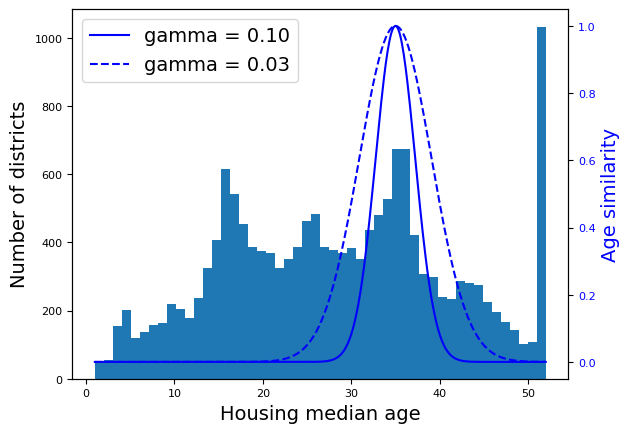

In [58]:
# this cell generates Figure

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

We can see that the new age similarity feature peaks at 35, right around the spike in the housing median age distribution. If this particular age group is well correlated with lower prices, there's a good chance that this new feature will help.

### Custom Transformers

Writing own, simple transformers:

In [59]:
from sklearn.preprocessing import FunctionTransformer

# custom log-transformer to transform heaf-tailed distribution to more bell-shaped (assuming feature is positive and tail is on the right)
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

# custom transformer that computes Guassian Radial Basis Function (RBF) similarity between each instance and a reference instance
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

Adding a feature that will meausre the geographic similarity between each district and San Francisco:

In [60]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]], shape=(16344, 1))

Another custom transformer allowing to compute ratio between input features:

In [61]:
ratio_transfomer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transfomer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

FunctionTransformer method is very handy, but if we would like our transformer to be trainable, learn parameters in the *fit()* method and use them later in the *transform()* method, we need to use a custom class. Such class needs three methods: *fit()*, *transform()*, and *fit_transform()*.

Here is an example of custom transformer that acts like *StandardScaler*:

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin    # for creating custom transformers
from sklearn.utils.validation import check_array, check_is_fitted   # for input validation

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs thanks to BaseEstimater!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

The following code demonstrates custom transformer that uses *KMeans* cluster in the *fit()* method to identify te main clusters in teh training data(), and then uses *rbf_kernel()* in the *transform()* method to measure how similar each sample is to each cluster enter:

In [63]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [64]:
print(housing[["latitude", "longitude"]].shape)
print(housing_labels.shape) # we need to reshape the labels to match the number of rows in the housing data

(16344, 2)
(16512,)


In [65]:
print(housing.isnull().sum())   # checking for missing values in the data
print(housing_labels.isnull().sum())    # checking for missing values in the labels

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64
0


In [66]:
# Drop rows with missing values in housing or housing_labels
housing_cleaned = housing.dropna(subset=["latitude", "longitude"])
housing_labels_cleaned = housing_labels[housing_cleaned.index]

# Verify shapes are consistent
print(housing_cleaned[["latitude", "longitude"]].shape)
print(housing_labels_cleaned.shape)

# Fit and transform with cleaned data
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing_cleaned[["latitude", "longitude"]], sample_weight=housing_labels_cleaned)

(16344, 2)
(16344,)


In [67]:
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.  , 0.99, 0.  , 0.14, 0.  ],
       [0.  , 0.66, 0.  , 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.99],
       [0.45, 0.  , 0.3 , 0.  , 0.  , 0.  , 0.7 , 0.01, 0.29, 0.  ]])

### Transformation Pipelines

Transformation pipelines from scikit-learn are designed to streamline the process of applying multiple data transformations and machine learning models in a sequential manner. Pipelines allow you to chain together various preprocessing steps and a final estimator (e.g., a machine learning model) so that you don't need to apply each step manually.

Below, a simple pipeline for numerical attributes is presented, which will first *impute* then *scale* the input features:

In [76]:
from sklearn.pipeline import Pipeline   # for creating a pipeline

sklearn.set_config(display="diagram")   # display the pipeline as a diagram

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

In [77]:
num_pipeline    # display the pipeline as a diagram

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

If you don't want to name transformers, you can use "*make_pipeline()*" function instead. It takes transformers as positional arguments and creates a Pipeline() using the names of the transfomrers' classes, in lowercases and without underscores.

In [78]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [79]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

Now, we call the pipeline's *fit_transfrom()* method and look at the output of the first two rows, rounded to two decimal places:

In [80]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.36,  0.14,  1.4 , -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

If we want to recover a nice DataFrame, we can use the pipeline's *get_feature_names_out()* method:

In [81]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [82]:
df_housing_num_prepared.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.422634,1.013124,1.860687,0.310661,1.359094,0.137572,1.395732,-0.937557
14973,0.596681,-0.702274,0.907526,-0.308789,-0.436356,-0.693276,-0.373537,1.171380


Pipelines support indexing:

In [83]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [84]:
num_pipeline[1]

StandardScaler()

In [85]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

So far we handled the categorical columns and the numerical columns separately. If we want to have a single transfomer for handling all columns, *ColumnTransformer* is used.

In [86]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In the above example, at first we import the *ColumnTransformer* class, then we define the list of numerical and categorical colun names and construct a simple pipeline for categorical attributes (we already have one for numerical attributes). Finally, we construct a *ColumnTransformer*. Its constructor needs a list of 3-tuples, each containing a name, a transformer, and a list of names (or indices) of columns that the transformer shoyld be applied to.

Listing all the column names may not be very convenient, nor needed, so SkLearn provides a *make_column_selector()* function that returns a selector function you can use to automatically select all the features of the given type, such as numerical or categorical. You can pass this selector function to the *ColumnTransformer* instead of column names or indices.<br> 
What is more, if you don't care about naming the transformers, you can use *make_column_transformer()*, which chooses the names for you, just like *make_pipeline()* does.

In [87]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [88]:
housing_prepared = preprocessing.fit_transform(housing)

The above code generally returns a NumPy array, but using *preprocessing.get_feature_names_out()* we can get the column names and wrap the data in a nice DataFrame as we did before.

And because we chose not to create names explicitely, instead of "num" and "cat" we have "pipeline-1" and "pipeline-2" this time:

In [90]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.422634,1.013124,1.860687,0.310661,1.359094,0.137572,1.395732,-0.937557,0.0,0.0,0.0,1.0,0.0
14973,0.596681,-0.702274,0.907526,-0.308789,-0.436356,-0.693276,-0.373537,1.171380,1.0,0.0,0.0,0.0,0.0


Now, we will create a single pipeline that will perform all the transformations that we experimented until now:  
- Missing values in numerical features will be imputed by replacing them with the median, as most ML algorithms don't expect missing values. In categorical features, missing values will be replaced by the most frequent category.
- The categorical feature will be one-hot encoded,a s most ML algorithms only accept numerical inputs.
- A few ratio features will be computed and added: *bedrooms_ratio*, *rooms_per_house*, and *people_per_house*. Hopefully, these will better correlate with the median house value, and thereby help the ML models.
- A few cluster similarity features will also be added. These will likely be more useful to the model than the latitude and longitude.
- Features with a long tail will be replaced by their logarithm, as most models prefer features with roughly uniform or Gaussian distributions.
- All numerical features will be standardized, as most ML algorithms prefer when all features have roughly the same scale.

In [92]:
def column_ratio(X):    # custom transformer that computes the ratio of two columns
    return X[:, [0]] / X[:, [1]]    # returns the ratio of the first column divided by the second column

def ratio_name(function_transformer, feature_names_in): # custom function to return the feature names out
    return ["ratio"]  # feature names out

def ratio_pipeline():   # custom pipeline that computes the ratio of two columns
    return make_pipeline(   # returns a pipeline
        SimpleImputer(strategy="median"),   # imputes missing values with the median
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),    # computes the ratio of two columns
        StandardScaler())   # standardizes the data

log_pipeline = make_pipeline(   # pipeline that computes the log of the data
    SimpleImputer(strategy="median"),   # imputes missing values with the median
    FunctionTransformer(np.log, feature_names_out="one-to-one"),    # computes the log of the data
    StandardScaler())   # standardizes the data
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)  # custom transformer that computes the similarity of the data to a cluster
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),  # default pipeline for numerical data
                                     StandardScaler())  # imputes missing values with the median and standardizes the data
preprocessing = ColumnTransformer([  # column transformer that preprocesses the data
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),  # computes the ratio of total_bedrooms to total_rooms
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),   # computes the ratio of total_rooms to households
        ("people_per_house", ratio_pipeline(), ["population", "households"]),   # computes the ratio of population to households
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",   # computes the log of the data
                               "households", "median_income"]), 
        ("geo", cluster_simil, ["latitude", "longitude"]),  # computes the similarity of the data to a cluster
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),  # one-hot encodes the categorical data
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

The above code performs all the transformations and outputs a NumPy array with 24 features:

In [94]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16344, 24)

In [95]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)